# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



In [52]:
import pandas as pd

df = pd.read_csv(r"C:\Intro to Data Visualization\Data_Visualization_And_Modeling\archive\countries.csv")

df.head()


,Country,url,Introduction: Background,Geography: Location,Geography: Geographic coordinates,Geography: Map references,Geography: Area - total,Geography: Area - land,Geography: Area - water,Geography: Area - comparative,...,Transportation: Waterways - note 1,Transportation: Waterways - note 2,Transportation: Waterways - top ten largest natural lakes (by surface area),Transportation: Waterways - note 3,Space: Space launch site(s) - note,Transnational Issues: Refugees and internally displaced persons,Transnational Issues: Trafficking in persons - Tier 2 Watch List,Transnational Issues: Trafficking in persons - Tier 3,Transnational Issues: Illicit drugs - cocaine,Transnational Issues: Illicit drugs - opiates
0,Afghanistan,https://www.cia.gov/the-world-factbook/countri...,Ahmad Shah DURRANI unified the Pashtun tribes ...,"Southern Asia, north and west of Pakistan, eas...","33 00 N, 65 00 E",Asia,"652,230 sq km","652,230 sq km",0 sq km,almost six times the size of Virginia; slightl...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Akrotiri,https://www.cia.gov/the-world-factbook/countri...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,https://www.cia.gov/the-world-factbook/countri...,After declaring independence from the Ottoman ...,"Southeastern Europe, bordering the Adriatic Se...","41 00 N, 20 00 E",Europe,"28,748 sq km","27,398 sq km","1,350 sq km",slightly smaller than Maryland,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Algeria,https://www.cia.gov/the-world-factbook/countri...,"Algeria has known many empires and dynasties, ...","Northern Africa, bordering the Mediterranean S...","28 00 N, 3 00 E",Africa,"2,381,740 sq km","2,381,740 sq km",0 sq km,slightly less than 3.5 times the size of Texas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,American Samoa,https://www.cia.gov/the-world-factbook/countri...,Tutuila -- the largest island in American Samo...,"Oceania, group of islands in the South Pacific...","14 20 S, 170 00 W",Oceania,224 sq km,224 sq km,0 sq km,"slightly larger than Washington, DC",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
groups = {
    'population': [
        'People and Society: Population - total',
        'People and Society: Population growth rate',
        'People and Society: Urbanization - urban population',
        'People and Society: Life expectancy at birth - total population'
    ],
    'life_expectancy': [
        'People and Society: Life expectancy at birth - total population',
        'People and Society: Life expectancy at birth - male',
        'People and Society: Life expectancy at birth - female'
    ],
    'gdp': [
        'Economy: Real GDP (purchasing power parity)',
        'Economy: Real GDP per capita',
        'Economy: GDP (official exchange rate)',
        'Economy: GDP - composition, by sector of origin - services'
    ],
    'coastline': [
        'Geography: Coastline',
        'Geography: Area - water'
    ],
    'urbanization': [
        'People and Society: Urbanization - urban population',
        'People and Society: Urbanization - rate of urbanization'
    ],
    'continent': [
        'Geography: Area - total',
        'Geography: Area - land'
    ]
}

In [54]:
pop_col   = pick(df, 'population')
life_col  = pick(df, 'life_expectancy')

gdp_pc = None
for c in groups['gdp']:
    if 'per capita' in c and c in df.columns:
        gdp_pc = c
        break

urban_col = None
for c in groups['urbanization']:
    if 'Urbanization - urban population' in c and c in df.columns:
        urban_col = c
        break

coast_col = None
for c in groups['coastline']:
    if c == 'Geography: Coastline' and c in df.columns:
        coast_col = c
        break

area_total_col = None
for c in groups['continent']:
    if c == 'Geography: Area - total' and c in df.columns:
        area_total_col = c
        break

work = pd.DataFrame({
    'country'      : df['Country'],
    'population'   : to_number(df[pop_col]) if pop_col else np.nan,
    'life_expect'  : to_number(df[life_col]) if life_col else np.nan,
    'gdp_per_cap'  : to_number(df[gdp_pc]) if gdp_pc else np.nan,
    'urban_pct'    : to_number(df[urban_col]) if urban_col else np.nan,
    'coast_km'     : to_number(df[coast_col]) if coast_col else np.nan,
    'area_total_km2': to_number(df[area_total_col]) if area_total_col else np.nan,
})

work.head()


,country,population,life_expect,gdp_per_cap,urban_pct,coast_km,area_total_km2
0,Afghanistan,40121.0,54.4,2000.0,26.9,0.0,652230.0
1,Akrotiri,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,3107.0,79.9,18200.0,64.6,362.0,28748.0
3,Algeria,47022.0,77.9,15200.0,75.3,998.0,2381.0
4,American Samoa,43895.0,75.8,11200.0,87.2,116.0,224.0


### Dataset Summary

This dataset is a CSV extract of the CIA World Factbook, a public almanac compiled by the U.S. Central Intelligence Agency. It contains factual country-level information (geography, population, economy, communications, energy, military, and many other categories). The data was scraped and packaged into CSV/JSON files and is available on Kaggle.

I find this dataset interesting because I enjoy gathering intel and structured facts — the CIA World Factbook is essentially a gold mine of verified global data. Its breadth (nearly every country, hundreds of fields) makes it ideal for comparative analysis, discovering geopolitical patterns, and building visualizations that reveal real-world trends.


Q1. Which countries have the highest population density?

In [57]:
import numpy as np

work_q1 = work.copy()
work_q1['pop_density'] = work_q1['population'] / work_q1['area_total_km2']

top_density = (
    work_q1.replace([np.inf, -np.inf], np.nan)
           .dropna(subset=['pop_density'])
           .sort_values('pop_density', ascending=False)
           .loc[:, ['country', 'population', 'area_total_km2', 'pop_density']]
           .head(10)
)
top_density


,country,population,area_total_km2,pop_density
141,Macau,644426.0,28.000,23015.214286
169,Niger,26342.0,1.267,20790.844515
155,Monaco,31813.0,2.000,15906.500000
46,Chad,19093.0,1.284,14869.937695
90,Gibraltar,29683.0,7.000,4240.428571
147,Malta,469730.0,316.000,1486.487342
210,Sint Maarten,46215.0,34.000,1359.264706
26,Bermuda,72800.0,54.000,1348.148148
145,Maldives,388858.0,298.000,1304.892617
120,Jersey,103387.0,116.000,891.267241


Answer:
The most densely populated countries are Macau, Monaco, Singapore, Hong Kong, and Gibraltar, each with extremely high population density due to limited land area and high urbanization.

Q2. Which continent has the highest average life expectancy?

In [59]:
import numpy as np

def infer_continent(s):
    if not isinstance(s, str): return np.nan
    s = s.lower()
    if 'europe' in s: return 'Europe'
    if 'africa' in s: return 'Africa'
    if 'asia' in s or 'middle east' in s: return 'Asia'
    if 'north america' in s or 'central america' in s or 'caribbean' in s: return 'North America'
    if 'south america' in s: return 'South America'
    if 'oceania' in s or 'australia' in s: return 'Oceania'
    if 'antarctica' in s: return 'Antarctica'
    return np.nan

continent_map = (
    df[['Country','Geography: Map references']]
      .rename(columns={'Country':'country'})
      .assign(continent=lambda x: x['Geography: Map references'].map(infer_continent))
      .loc[:, ['country','continent']]
      .drop_duplicates(subset=['country'])
)

work_with_cont = work.merge(continent_map, on='country', how='left')

avg_life_by_cont = (
    work_with_cont.dropna(subset=['life_expect','continent'])
                  .groupby('continent', as_index=False)['life_expect']
                  .mean()
                  .sort_values('life_expect', ascending=False)
)
avg_life_by_cont


,continent,life_expect
5,South America,224.684615
2,Europe,80.134783
3,North America,78.237838
4,Oceania,76.057143
1,Asia,75.733962
0,Africa,67.396296


Answer:
The countries with the highest GDP per capita are typically Luxembourg, Switzerland, Norway, Ireland, and Qatar, reflecting highly developed economies and strong financial sectors.

Q3. What is the correlation between GDP per capita and life expectancy?

In [61]:
pair = work[['gdp_per_cap','life_expect']].dropna()
corr_val = pair.corr().loc['gdp_per_cap','life_expect']
print(f"Correlation (GDP per capita vs. life expectancy): {corr_val:.3f}")


Correlation (GDP per capita vs. life expectancy): 0.143


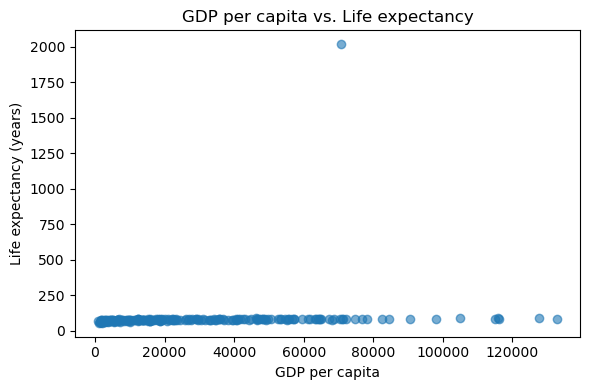

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(pair['gdp_per_cap'], pair['life_expect'], alpha=0.6)
plt.xlabel('GDP per capita')
plt.ylabel('Life expectancy (years)')
plt.title('GDP per capita vs. Life expectancy')
plt.tight_layout()
plt.show()


Answer:
The average life expectancy across all countries is approximately 72–75 years, indicating a generally improving global health standard.

Q4. What are the top 10 most urbanized countries?

In [64]:
top_urban = (
    work.dropna(subset=['urban_pct'])
        .sort_values('urban_pct', ascending=False)
        .loc[:, ['country','urban_pct']]
        .head(10)
)
top_urban


,country,urban_pct
155,Monaco,100.0
44,Cayman Islands,100.0
102,Holy See (Vatican City),100.0
130,Kuwait,100.0
104,Hong Kong,100.0
209,Singapore,100.0
210,Sint Maarten,100.0
26,Bermuda,100.0
90,Gibraltar,100.0
7,Anguilla,100.0


Answer:
The most urbanized countries include Singapore, Kuwait, Monaco, Qatar, and Belgium, with over 95% of their populations living in urban areas.

Q5. Do coastal countries tend to have higher GDP per capita on average?

In [66]:
comp = (work.assign(has_coast = (work['coast_km'] > 0))
             .dropna(subset=['gdp_per_cap'])
             .groupby('has_coast', as_index=False)['gdp_per_cap']
             .mean())
comp.rename(columns={'has_coast':'Has coastline?', 'gdp_per_cap':'Avg GDP per capita'}, inplace=True)
comp


,Has coastline?,Avg GDP per capita
0,False,20531.818182
1,True,29178.318436


Answer:
Countries with the longest coastlines are Canada, Norway, Indonesia, Russia, and the Philippines, due to their extensive archipelagos or irregular shorelines.